In [1]:
library(tidyverse)
options(repr.plot.width = 7)
source("/nfs/research/irene/ysong/MY_BIN/ggplot_themes.r")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots


Loading required package: viridisLite


Attaching package: ‘scales’


The following object is masked from ‘package:viridis’:

    viridis_pal


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor



Attaching package: ‘ggpubr’


The following object is masked from ‘package:cowplot’:

    get_legend



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [2]:
all_species = c("hsapiens", "mmulatta",'cjacchus','ptroglodytes','ggorilla' )

In [3]:
species_2 = 'hsapiens'
species_1 = 'ptroglodytes'

In [5]:
data <- read_csv(paste0("o2o_heatmap_data_dist_", species_1, "_", species_2, "_1TPM.csv"))

Rows: 5 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): dist_category_hsapiens
dbl (5): expressed in less than 30%, expressed in over 30%, expressed in ove...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [6]:
data

dist_category_hsapiens,expressed in less than 30%,expressed in over 30%,expressed in over 90%,expressed in single,lowly expressed
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
expressed in less than 30%,54.92,8.68,0.65,23.79,16.59
expressed in over 30%,22.23,56.05,5.36,6.63,5.75
expressed in over 90%,3.27,9.75,93.08,1.19,2.62
expressed in single,9.97,1.33,0.12,22.64,31.59
lowly expressed,4.52,1.37,0.25,16.21,55.58


In [11]:
order =  rev(c('expressed in over 90%','expressed in over 30%','expressed in less than 30%','expressed in single','lowly expressed'))
order

[1] "lowly expressed"            "expressed in single"       
[3] "expressed in less than 30%" "expressed in over 30%"     
[5] "expressed in over 90%"

In [12]:
options(repr.plot.width = 4, repr.plot.height = 3)


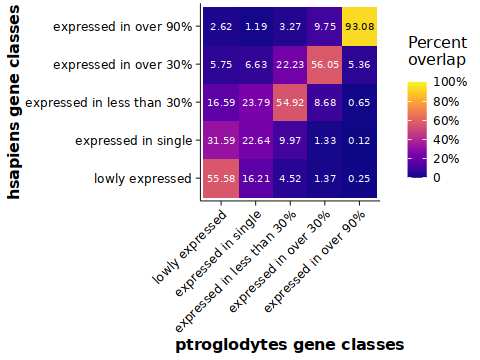

In [13]:
data %>% pivot_longer(cols = -c(1), names_to = paste0('dist_category_',species_1), values_to = 'pct')  %>% 
    rename(dist_category_species_1 = eval(paste0('dist_category_',species_1))) %>% 
    rename(dist_category_species_2 = eval(paste0('dist_category_',species_2))) %>% 
    mutate(dist_category_species_1 = factor(dist_category_species_1, levels = order)) %>% 
    mutate(dist_category_species_2 = factor(dist_category_species_2, levels = order)) %>% 
    ggplot(aes(x = dist_category_species_1, 
               y = dist_category_species_2,
               fill = pct)) +
    geom_tile() + 
    geom_text(aes(label = pct, color = ifelse(pct > 70, 'black', 'white')), size = 2, show.legend = FALSE) +
    scale_fill_viridis(limits = c(0, 100), breaks = c(0, 20, 40, 60, 80, 100), option = 'plasma',
                       labels = c(0, '20%', '40%', '60%', '80%', '100%'), name = 'Percent\noverlap') +
    common_45x  +
    scale_colour_manual(values=c("white"="white", "black"="black")) +
    labs(x = paste0(species_1, ' gene classes'), y = paste0(species_2, ' gene classes'))

In [15]:
data_all = data.frame()

all_pairs <- data.frame(
  species_1 = c('cjacchus', 'cjacchus', 'cjacchus', 'cjacchus', 'mmulatta', 'mmulatta', 'mmulatta', 'ggorilla', 'ggorilla', 'ptroglodytes', 'ptroglodytes'),
  species_2 = c('mmulatta', 'ggorilla', 'ptroglodytes', 'hsapiens', 'ggorilla', 'ptroglodytes', 'hsapiens', 'ptroglodytes', 'hsapiens', 'hsapiens', 'hsapiens')
)

# Iterate over rows and assign values to species_1 and species_2
for (i in 1:nrow(all_pairs)) {
    species_1 <- all_pairs[i, 'species_1']
    species_2 <- all_pairs[i, 'species_2']

    message(species_1)
    message(species_2)

    data <- read_csv(paste0("o2o_heatmap_data_dist_", species_1, "_", species_2, "_1TPM.csv"))
    fig = data %>% pivot_longer(cols = -c(1), names_to = paste0('dist_category_',species_1), values_to = 'pct')  %>% 
    rename(dist_category_species_1 = eval(paste0('dist_category_',species_1))) %>% 
    rename(dist_category_species_2 = eval(paste0('dist_category_',species_2))) %>% 
    mutate(dist_category_species_1 = factor(dist_category_species_1, levels = order)) %>% 
    mutate(dist_category_species_2 = factor(dist_category_species_2, levels = order)) %>% 
    ggplot(aes(x = dist_category_species_1, 
               y = dist_category_species_2,
               fill = pct)) +
    geom_tile() + 
    geom_text(aes(label = pct, color = ifelse(pct > 70, 'black', 'white')), size = 2, show.legend = FALSE) +
    scale_fill_viridis(limits = c(0, 100), breaks = c(0, 20, 40, 60, 80, 100), option = 'plasma',
                       labels = c(0, '20%', '40%', '60%', '80%', '100%'), name = 'Percent\noverlap') +
    common_45x  +
    scale_colour_manual(values=c("white"="white", "black"="black")) +
    labs(x = paste0(species_1, ' gene classes'), y = paste0(species_2, ' gene classes'))

    saveRDS(object = fig, file =  paste0("o2o_heatmap_figs_dist/", species_1, "_", species_2, "_one2one_heatmap_dist_1TPM_r.rds"))

    ggsave(plot = fig, filename = paste0("o2o_heatmap_figs_dist/", species_1, "_", species_2, "_one2one_heatmap_dist_1TPM_r.pdf"), height = 3, width = 4)

    data_add = data %>% pivot_longer(cols = -c(1), names_to = paste0('dist_category_',species_1), values_to = 'pct') %>% 
mutate(species_1 = species_1) %>% mutate(species_2 = species_2) 

    colnames(data_add) = c('dist_category_species_2', 'dist_category_species_1', 'pct', 'species_1', 'species_2')

    data_all = rbind(data_all, data_add)
    

    
}

cjacchus

mmulatta

Rows: 5 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): dist_category_mmulatta
dbl (5): expressed in less than 30%, expressed in over 30%, expressed in ove...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“‘mode(bg)’ differs between new and previous
	 ==> NOT changing ‘bg’”
cjacchus

ggorilla

Rows: 5 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): dist_category_ggorilla
dbl (5): expressed in less than 30%, expressed in over 30%, expressed in ove...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“‘mode(bg)’ differs between new and previous
	 ==> NOT changing ‘bg’”
cjacchus

ptroglodytes

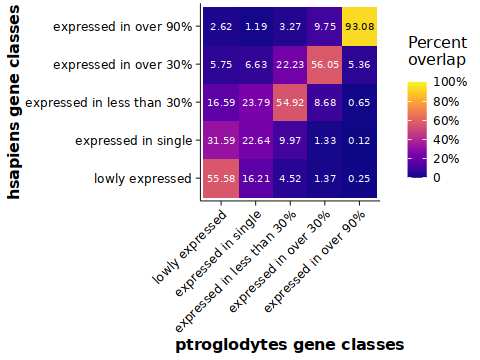

In [16]:
fig

In [17]:
options(repr.plot.width = 7, repr.plot.height = 6)


In [18]:
levels(factor(data_all$dist_category_species_1))

[1] "expressed in less than 30%" "expressed in over 30%"     
[3] "expressed in over 90%"      "expressed in single"       
[5] "lowly expressed"

In [19]:
data_all

dist_category_species_2,dist_category_species_1,pct,species_1,species_2
<chr>,<chr>,<dbl>,<chr>,<chr>
expressed in less than 30%,expressed in less than 30%,37.98,cjacchus,mmulatta
expressed in less than 30%,expressed in over 30%,17.81,cjacchus,mmulatta
expressed in less than 30%,expressed in over 90%,3.08,cjacchus,mmulatta
expressed in less than 30%,expressed in single,18.30,cjacchus,mmulatta
expressed in less than 30%,lowly expressed,18.29,cjacchus,mmulatta
expressed in over 30%,expressed in less than 30%,21.50,cjacchus,mmulatta
expressed in over 30%,expressed in over 30%,32.82,cjacchus,mmulatta
expressed in over 30%,expressed in over 90%,7.87,cjacchus,mmulatta
expressed in over 30%,expressed in single,9.19,cjacchus,mmulatta


In [24]:
fig_all = data_all %>% group_by(dist_category_species_2, dist_category_species_1) %>% mutate(avg_pct_cross_species = mean(pct)) %>% 
select(dist_category_species_2, dist_category_species_1, avg_pct_cross_species) %>% unique() %>% 
    ggplot(aes(x = factor(dist_category_species_1, levels = order), y = factor(dist_category_species_2, levels = order), fill = avg_pct_cross_species)) +
    geom_tile() + 
    geom_text(aes(label = round(avg_pct_cross_species, digits = 2),
                  color = ifelse(avg_pct_cross_species > 70, 'black', 'white')), size = 2, show.legend = FALSE) +
    scale_fill_viridis(limits = c(0, 100), breaks = c(0, 20, 40, 60, 80, 100), option = 'plasma',
                       labels = c(0, '20%', '40%', '60%', '80%', '100%'), name = 'Percent\noverlap') +
    common_45x  +
    scale_colour_manual(values=c("white"="white", "black"="black")) +
    labs(x = 'Species A gene class', y = 'Species B gene class') 

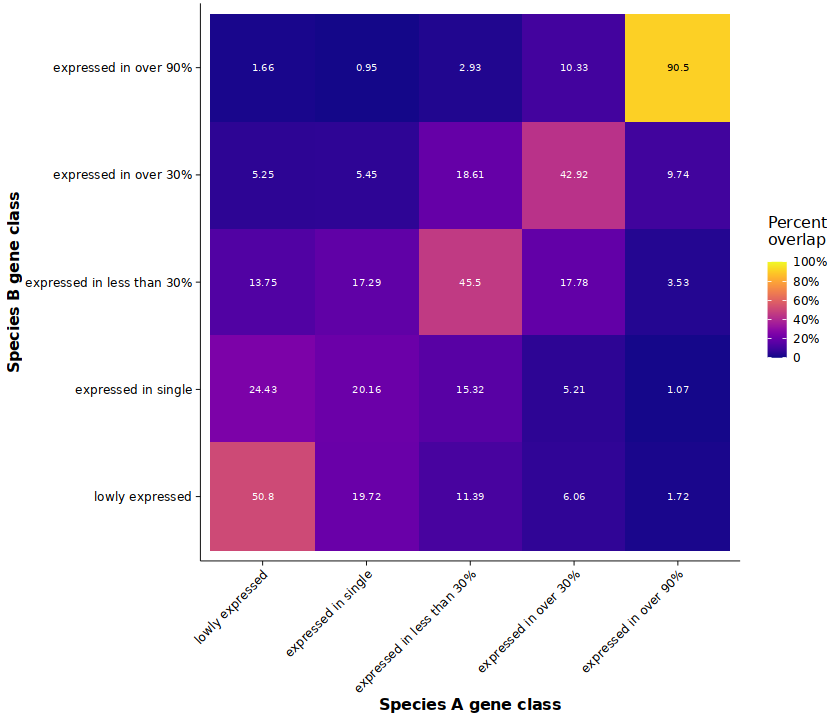

In [25]:
fig_all

In [26]:
saveRDS(object = fig_all, file =  paste0("o2o_heatmap_figs_dist/", "avg_species_a_b_one2one_heatmap_dist_1TPM_r.rds"))

ggsave(plot = fig_all, filename = paste0("o2o_heatmap_figs_dist/", "avg_species_a_b_one2one_heatmap_dist_1TPM_r.pdf"), height = 3, width = 4)


Warning message:
“‘mode(bg)’ differs between new and previous
	 ==> NOT changing ‘bg’”
